# AM2061 Algorithm 2-2
## The Fixed Point Method

The Fixed Point Method is an algoritm used to determine the fixed points of Non-linear functions. 

It uses the Fixed Point Theorem to prove that a fixed point lies within a given range $\left[ a, b \right]$.

A brief explanation is as follows:

* A fixed point is a point such that $f(x) = x$. Thus these can be found where:
  * $f(x) - x = 0$, so must get the root(s) of the modified function.
  * The intersection(s) of $y = x$ and $f(x) = x$.

* We must first provide an initial guess $p_0$, if this guess is too far from the actual, issues may arise.

* Now, the Fixed Point Theorem states that a fixed point is in a given range if $g(x)$ is on this range, and if:  

\begin{equation} \left | {g}'(x) \right | \leq k, 0 < k < 1, \forall x \in \left[ a, b \right] \end{equation}

* To "attract" these fixed points, we thus need to choose our initial guess $p_0$ in such a range that the absoloute value of the slope is less than 1. Upon doing so, we can then employ the sequence:

\begin{equation} p_n = g(p_{n-1}) , n \geq 1 \end{equation}

* To do this, we simply:
  * Set $p = g(p_0)$
  * Perform our check.
  * Set $p = p_0$
    
* We repeat this procedure until either:
  * $\left | p - p_0 \right | < ERR$, so we have found the root within the allowed error. (successful state)
  * At max number of iterations. (unsuccessful state)

The following is the pseudocode provided:

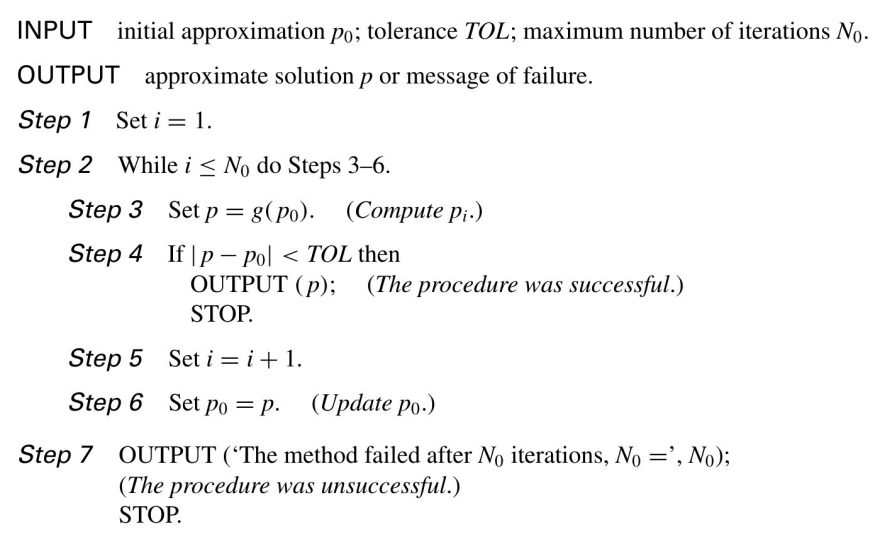

Let us now create this in Python.

First we must define a function, note that any function can be used, for simplicity I will use what was given in L04. We can (for the sake of testing) find the fixed points analytically by setting:
\begin{equation} y = x = \frac{x^2 - 1}{3} \end{equation}

\begin{equation} \Rightarrow x^2 - 3x - 1 = 0 \end{equation}

This equation has roots (so our funciton has fixed points) of $x = -0.303$ and $x = 3.303$. These are the values we expect to find. However, it is important to note that for the $x = 3.303$ fixed point:
\begin{equation} \left | {g}'(3.303) \right | = \left | \frac{2 (3.303)}{3} \right | = 2.202 > 1 \end{equation}

And so we can expect the function to diverge rapidly from this point:

In [4]:
def functionUsed(x):
    g = (x**2 - 1) / 3.0
    return g

Now let us define the algorithm, we will need the initial approximation, the function, the allowed error, and the max number of iterations.

Note that there are comments intended to help understanding, and be sure to refer to the pseudocode if stuck!

In [1]:
def FixedPointMethod(p0, func, ERR, N):
    i = 1
    
    while i <= N: # while not at max iterations
        p = func(p0) # next approx.
        
        if abs(p - p0) < ERR: # if difference in previous and next approx. are within allowed error
            print(f"Fixed Point = {p}")
            print("Procedure completed successfully.")
            break # ends while loop
        
        p0 = p # update previous
        i += 1
    
    if i > N:
        print(f"Method failed after {N} iterations.")
        print("Procedure was unsuccessful.")

We can now test this algorithm for a fixed point. Note that for a simple function such as this we can get really close to the actual answer with a small amount of iterations!

In [43]:
FixedPointMethod(-0.876, functionUsed, 0.000000000000001, 100)

Fixed Point = -0.30277563773199456
Procedure completed successfully.


We can also try for a different initial guess, this will give the other fixed point (see notes above):

In [42]:
FixedPointMethod(3.303, functionUsed, 0.001, 100)

Fixed Point = 3.3032696666666665
Procedure completed successfully.


The following is what a failed procedure looks like (note used a very small number of iterations):

In [6]:
FixedPointMethod(2.567, functionUsed, 0.000000000000001, 10)

Method failed after 10 iterations.
Procedure was unsuccessful.


The following is an overflow error, this is because the function rapidly diverges above the $x = 3.303$ fixed point:

In [46]:
FixedPointMethod(3.5, functionUsed, 0.000000000000001, 100)

OverflowError: (34, 'Result too large')

In [6]:
import math

func = lambda x: math.tan(x) - x
FixedPointMethod(4, func, 0.0000001, 1000000)

Method failed after 1000000 iterations.
Procedure was unsuccessful.
